# An application of Machine Learning 
- Predict the calories burnt due to exercise
___

<p>1. Get familiar with the data.</p>

<p>2. Find which features in the data are most predictive of our target variable (here, calories burnt). <font color='green'>Uncover relationships between variables</font> by making plots. </p>

<p>The data includes the features and the target, the algorithm is <font color='green'>learning</font> the patterns or relationships between the variables so that it can then be used to make <font color='green'>predictions</font>. This is known as supervised learning. </p>

<p>3. Be introduced to different Machine Learning algorithms, which are different ways to model the relationship between the dependent and independent variables. For example:</p>

<p><font color='green'>Linear Regression</font> (fits a straight line through the data; the model fits for the intercept and the slope relative to each independent variable: y=a+bx</p>
<tr>
<td><img src="linear-reg.jpg" width="300" height="200" alt="">
<tr>

<p><font color='green'>Polynomial Regression</font> (fits a curve through the data: y=a+bx+cx^2 if it is second order)</p>

<p><font color='green'>Decision Tree</font> (learns the best way to split the data on the different features such that after all the splits a neat prediction can be made eg. if female, between 40-60 years of age, of medium weight, then 15-10 minutes of exercise will burn N number of calories (N being the average calories of the subsample defined by the splits; Essentially a decision tree asks: What feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)? This is done using concepts of Entropy and Information gain. Advantages: simple, easy to implement, can be used to predict categorical variable (classification) or real variable (regression); Disadvantages: weak learners, i.e. not very accurate). See [here](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html) for more.</p>
<tr>
<td><img src="decisiontree.jpg" width="300" height="200" alt="">
<td><img src="DT2.jpg" width="300" height="200" alt="">    
<tr>

<p><font color='green'>Random Forest</font> consists of taking the average prediction from many decision trees, leading to more accurate predictions. Each tree sees a random selection of data with replacement, and is allowed to split on a random selection of features. These steps ensure that the trees are uncorrelated. See [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) for more.</p>    
<img src="randomforest.jpg" width="300" height="200" alt="">

<p>4. Learn how to split the data into a training set and a test set. Apply machine learning algorithms to model the training data. <font color='green'>Evaluate the performance of your model</font> on the test set. </p>  
    
<p>Because it is aften easy to over-fit to any given data, we split our data randomly into a training set and a test set. We then build the model based only on the training set, and see how well it does on the "unseen" test set.    </p>   
    
<p>And how do we evaluate the performance of the model on the test set? We can quantify the difference between the actual observations and the predictions using RMSE (find the average square of the difference between these two and take the square root; can you see why you would want to square the difference?) or something called the R-squared (The proportion of the variability in the data that is explained by the model; if the model matches the data well then $SS_{res}$ is small and this measure is close to 1.) </p>   


<tr>
<td><img src="rmse_1.jpg" width="300" height="200" alt=""></td>  
<td><img src="rmse_0.jpg" width="300" height="200" alt="">    
<td><img src="Rsquared.jpg" width="300" height="200" alt=""></td>   
</tr>    

<p>5. Use your best model to predict calories for a new test case.</p>  
    
<p>6. Make a <font color='green'>simple web app</font> to showcase your model.</p>

In [106]:
import pandas as pd
import seaborn as sns
df_ex = pd.read_csv('exercise.csv')
df_cal=pd.read_csv('calories.csv')
df = pd.merge(df_ex, df_cal, on='User_ID')
df.drop('User_ID', axis=1, inplace=True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [82]:
df_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df_cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


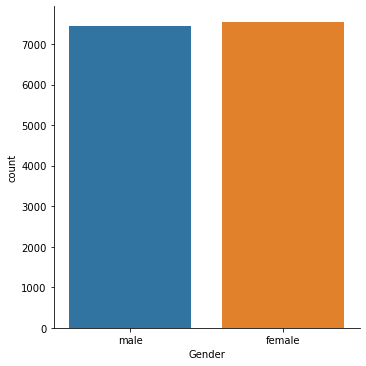

In [18]:
# We have one categorical variable, for which we can make a count plot
sns.catplot(x='Gender', kind='count', data=df)

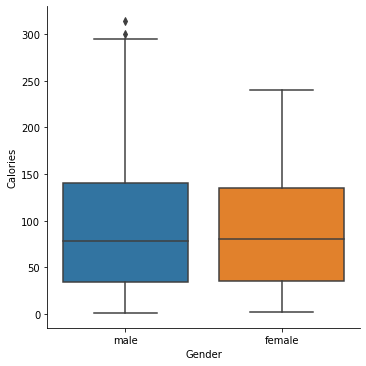

In [19]:
# Or we can look at the dependence of a numerical variable on a categorical variable
sns.catplot(x='Gender', y='Calories', kind='box', data=df)

/Users/piamukherjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

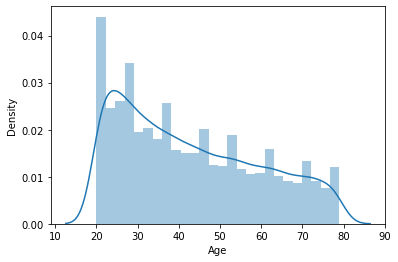

In [14]:
sns.distplot(df['Age'])

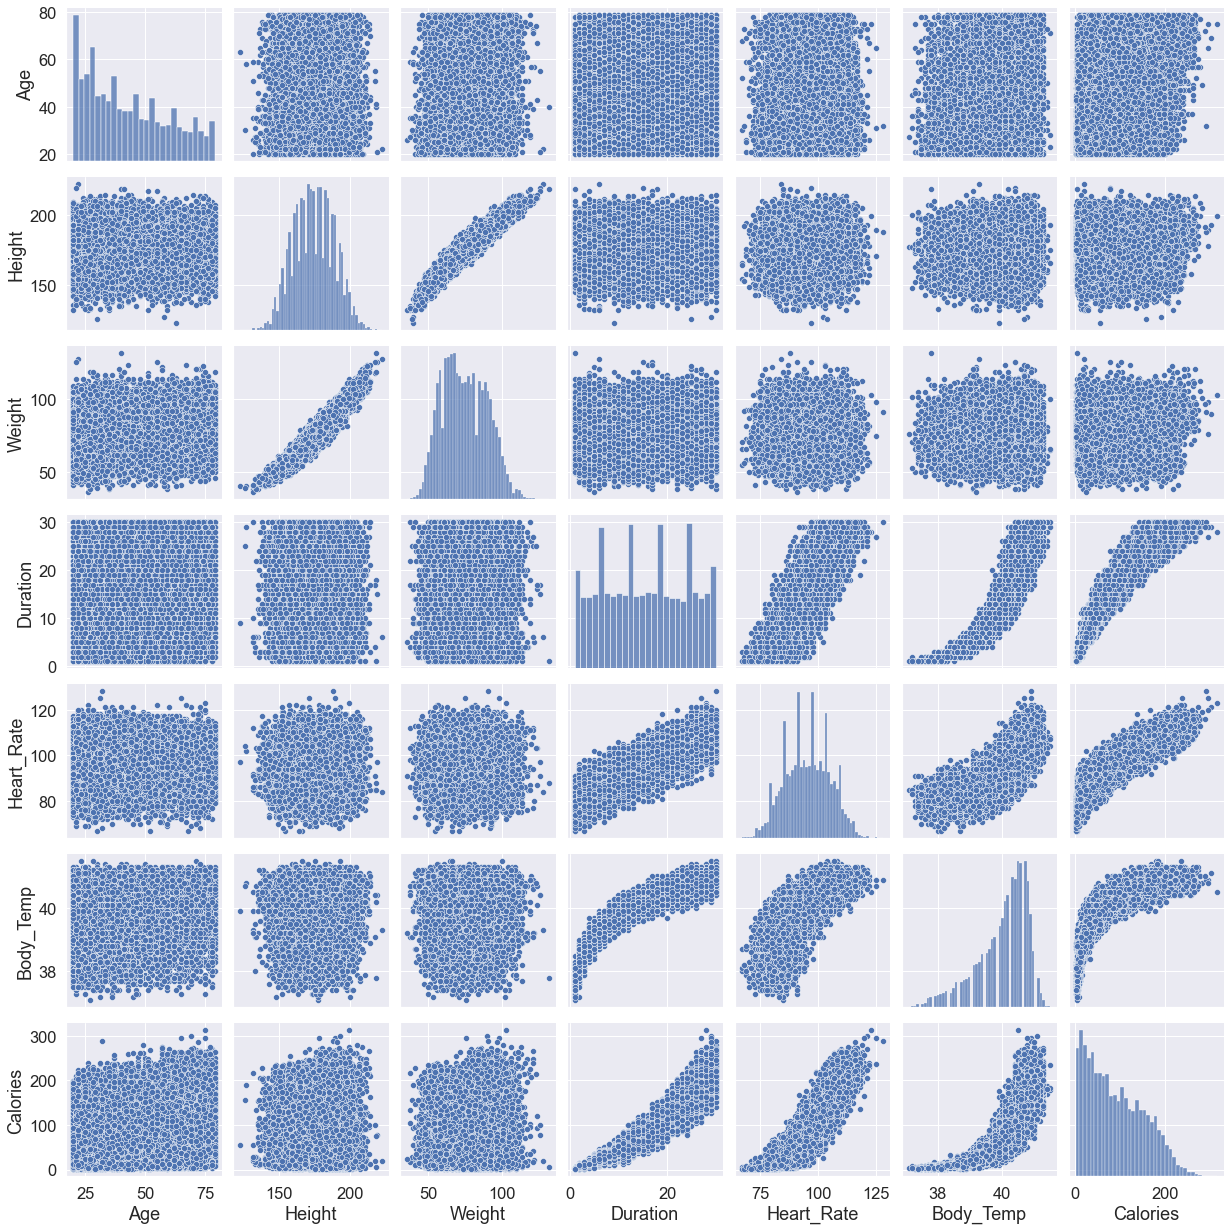

In [80]:
# A scatter plot shows the relationship between two variables. A pairplot shows this for all pairs of variables. 
sns.set(font_scale=1.5)
sns.pairplot(df)

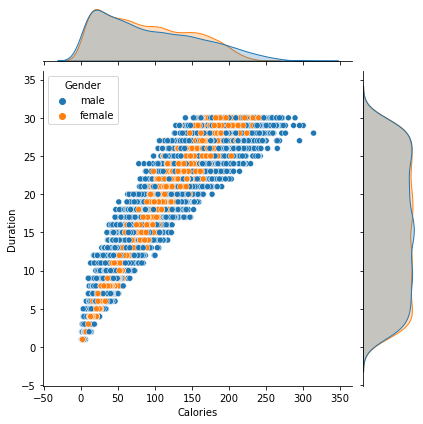

In [16]:
# A third dimension can be added using color. 
sns.jointplot(x='Calories', y='Duration', data=df, hue='Gender')

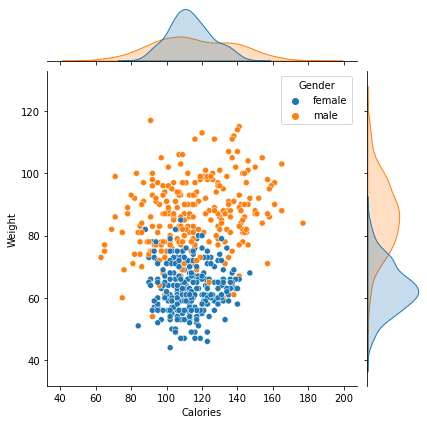

In [17]:
# We can also take a slice of the data in one variable
dfnew=df[(df['Duration']<20.5)]
dfnew=dfnew[(dfnew['Duration']>19.5)]
#print(dfnew.head())
sns.jointplot(x='Calories', y='Weight', data=dfnew, hue='Gender')

/Users/piamukherjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Duration'>

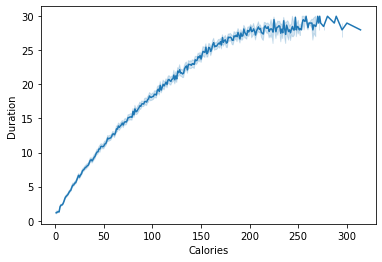

In [9]:
sns.lineplot(df['Calories'],df['Duration'])

/Users/piamukherjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Duration'>

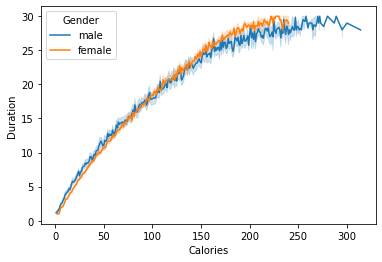

In [12]:
sns.lineplot(df['Calories'],df['Duration'], hue=df['Gender'])

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df[['Duration']]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)

y_pred = lr_1.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print('Root Mean Squared Error: {}'.format(np.sqrt(mse)))

Root Mean Squared Error: 18.57527901015758


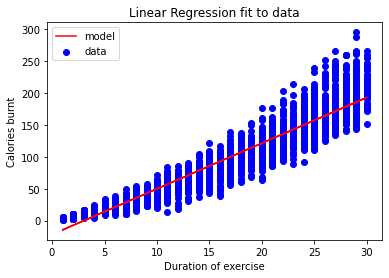

In [70]:
plt.scatter(X_test, y_test, color='blue', label='data') # plotting the observation line
plt.plot(X_test, y_pred, color='red', label='model') # plotting the regression line
plt.xlabel("Duration of exercise")
plt.ylabel("Calories burnt")
plt.title('Linear Regression fit to data')
plt.legend()
plt.show()

In [31]:
lr_1.coef_, lr_1.intercept_,lr_1.score(X_train,y_train),lr_1.score(X_test,y_test)

(array([7.1533745]),
 -21.666838045069156,
 0.9123562018290068,
 0.9145047527249381)

In [66]:
print(np.unique(X_test))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


Root Mean Squared Error: 16.57926508134714


<Figure size 432x288 with 0 Axes>

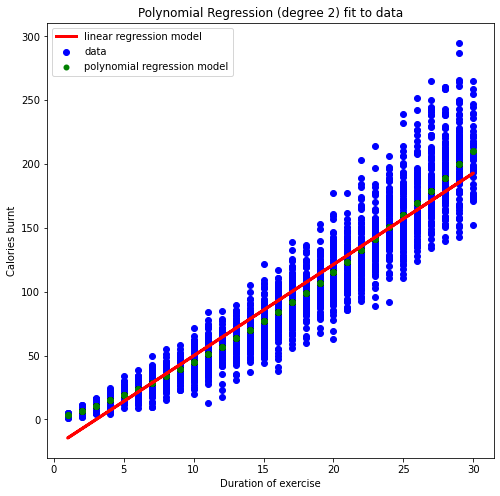

(array([0.        , 3.27527453, 0.12475965]),
 -0.12923090533904258,
 0.9280512790803981,
 0.9318914190236609)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
  
poly.fit(X_train_poly, y_train)
lr_2 = LinearRegression()
lr_2.fit(X_train_poly, y_train)

                               
y_pred2 = lr_2.predict(X_test_poly)
mse = mean_squared_error(y_pred2, y_test)
print('Root Mean Squared Error: {}'.format(np.sqrt(mse)))

plt.clf()
plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test, color='blue', label='data') # plotting the observation line
plt.plot(X_test, y_pred, color='red', lw=3, label='linear regression model')
plt.scatter(X_test, y_pred2, color='green', lw=3, label='polynomial regression model', marker='.') # plotting the regression line
plt.xlabel("Duration of exercise")
plt.ylabel("Calories burnt")
plt.title('Polynomial Regression (degree 2) fit to data')
plt.legend()
plt.show()

lr_2.coef_, lr_2.intercept_,lr_2.score(X_train_poly,y_train),lr_2.score(X_test_poly,y_test)

In [59]:
print(X_test[:10]), print(y_pred2[:10])

       Duration
11499      26.0
6475       29.0
13167      11.0
862        24.0
5970       29.0
6706       29.0
3017       15.0
3781       10.0
3898       14.0
2250       12.0
[169.36543036 199.77659621  50.99470661 150.33891629 199.77659621
 199.77659621  77.07080834  45.09947943  70.17750396  57.13945309]


(None, None)

In [77]:
X= df[['Duration', 'Heart_Rate', 'Body_Temp', 'Weight']]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)

y_pred3 = lr_3.predict(X_test)
mse = mean_squared_error(y_pred3, y_test)
print('Root Mean Squared Error: {}'.format(np.sqrt(mse)))

Root Mean Squared Error: 14.499909493342997


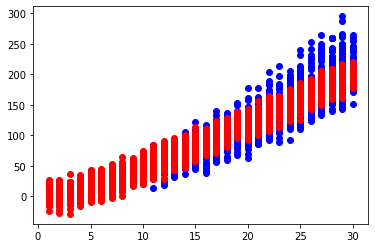

In [78]:
plt.scatter(X_test['Duration'], y_test, color='blue') # plotting the observation line
plt.scatter(X_test['Duration'], y_pred3, color='red',marker='o') # plotting the regression line
plt.show()

In [43]:
X_test_point= df[['Duration', 'Heart_Rate', 'Weight']]
y_test_point= df['Calories']
X_test_point['Duration']=30
X_test_point['Heart_Rate']=180
X_test_point['Weight']=40
Y_test_point=lr_2.predict(X_test_point)
print(Y_test_point)

[327.47017895 327.47017895 327.47017895 ... 327.47017895 327.47017895
 327.47017895]


<ipython-input-43-87503fce8d07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_point['Duration']=30
<ipython-input-43-87503fce8d07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_point['Heart_Rate']=180
<ipython-input-43-87503fce8d07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
le = LabelEncoder()
df.loc[:, 'Gender'] = le.fit_transform(df.Gender.values)
x_train, x_val, y_train, y_val = train_test_split(df.drop('Calories', axis=1), df.Calories.values, test_size=0.2, random_state=42)

In [85]:
lr = LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
r2 = r2_score(y_val, preds)

print(f'Model=LinearRegression, RMSE={rmse:.3f}, R2={r2:.3f}')

Model=LinearRegression, RMSE=11.489, R2=0.967


In [86]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
preds = dt.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
r2 = r2_score(y_val, preds)

print(f'Model=DecisionTree, RMSE={rmse:.3f}, R2={r2:.3f}')

Model=DecisionTree, RMSE=5.336, R2=0.993


In [87]:
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(x_train, y_train)
preds = rf.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
r2 = r2_score(y_val, preds)

print(f'Model=RandomForest, RMSE={rmse:.3f}, R2={r2:.3f}')

Model=RandomForest, RMSE=2.751, R2=0.998


In [101]:
#Gender	Age	Height	Weight	Duration	Heart_Rate	Body_Temp
X_test_point= pd.DataFrame(columns=['Gender','Age','Height','Weight','Duration', 
'Heart_Rate', 'Body_Temp'])
Y_test_point= pd.DataFrame(columns=['Calories'])

X_test_point['Gender'].loc[0]=1
X_test_point['Age'].loc[0]=45
X_test_point['Height'].loc[0]=180
X_test_point['Body_Temp'].loc[0]=37.5
X_test_point['Duration'].loc[0]=30
X_test_point['Heart_Rate'].loc[0]=100
X_test_point['Weight'].loc[0]=200
X_test_point.loc[0]=[1,45,180,40,20,100,37.5]
print(X_test_point)
Y_test_point=rf.predict(X_test_point)
print(Y_test_point)

   Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0     1.0  45.0   180.0    40.0      20.0       100.0       37.5
[113.13333333]


In [105]:
import joblib
import streamlit as st
from joblib import dump
dump(rf, 'rf_predictcalories.joblib')

model = joblib.load('rf_predictcalories.joblib')
st.write("# Predictor of calories burnt through exercise")
duration= st.number_input("Enter your exercise duration")

X_test_point= pd.DataFrame(columns=['Gender','Age','Height','Weight','Duration', 
'Heart_Rate', 'Body_Temp'])
Y_test_point= pd.DataFrame(columns=['Calories'])

X_test_point.loc[0]=[1,45,180,40,duration,100,37.5]
Y_test_point=model.predict(X_test_point)
st.write("Calories burnt=", Y_test_point)

Can't run streamlit from inside a jupyter notebook. You'll need to same the streamlit code as caloriesapp.py and run it with "streamlit run caloriesapp.py"